<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/activation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activation Functions

*Author: Alexander Del Toro Barba*

## Overview

![Activation Function](https://raw.githubusercontent.com/deltorobarba/repo/master/activation.png)

* The activation function is the non-linear function that we apply over the output data coming out of a particular layer of neurons before it propagates as the input to the next layer.
* Activation functions reside within neurons and transform input values into acceptable and useful range. They can introduce non-linearity to a network.
* There are various kinds of activation functions and it has been found, empirically, that some of them works better for large datasets or particular problems than the others. 
* Neural networks extract hidden pattern from a dataset by observing given examples of known answers. Evidently, it does so by comparing its predictions to the ground truth (labeled images for example) and turning the parameters of the model. The difference between the prediction and the ground truth is called the ‘classification error’.
* Parameters of a DL model consists of a set of weights connecting neurons across layers and bias terms which add to those layers. So, the ultimate goal is to set those weights to specific values which reduces the overall classification error. This is a minimization operation, and consequently, an optimization technique is needed.
* The overall representation structure of a deep learning model is a highly complex nonlinear function and therefore, the optimizer is responsible for minimizing the error produced by the evaluation of this complex function. Therefore, standard optimization like linear programming does not work for DL models and innovative nonlinear optimization must be used.
* These two components – **activation functions** and **nonlinear optimizers** – are at the core of every deep learning architecture. However, there is considerable variety in the specifics of these components.



**Necessary Characteristics of Activation Function**

Activation functions must be:

1. Non-constant (obvious)
2. Bounded
3. Monotonically increasing
4. Continuous

These are the conditions under which the universal approximation theorem holds. The universal approximation theorem proves that, under the above conditions, any continuous function of N-variables defined on a compact subset of R^N can be approximated by a three- layer (input, hidden layer, output) neural network with that activation function.

The universal approximation theorem is certainly one of the most rigorous tenets of neural networks.

Of course, if the prediction problem at hand does not deal with continuous variables or cannot be approximated by a problem that does, then the above is no longer valid and the choice of activation functions becomes more of a customized problem.

**Selection Criteria**

Activation layers are a type of hyperparameter, and you’ll need to experiment with all of them in order to find which works best for you. You can narrow your search by referring to prior work in the field for your particular problem. For example, it has already been shown that tanh activations work better for image classification while leaky ReLUs work better for temporal sequences such as video.

# Overview of Popular Activation Functions

![Optimizer](https://raw.githubusercontent.com/deltorobarba/repo/master/optimizer_3.png)

![Optimizer](https://raw.githubusercontent.com/deltorobarba/repo/master/optimizer_1.png)

Sources: [Stanford.edu](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning) & [Deep Dive into Math Behind Deep Networks](https://towardsdatascience.com/https-medium-com-piotr-skalski92-deep-dive-into-deep-networks-math-17660bc376ba)

**Import Libraries**

In [1]:
# Populating the interactive namespace from numpy and matplotlib
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import math 
sns.set(rc={'figure.figsize':(10, 4)})

Populating the interactive namespace from numpy and matplotlib


# 1. Sigmoid Functions

## 1.1 Logistic Regression ('Sigmoid')

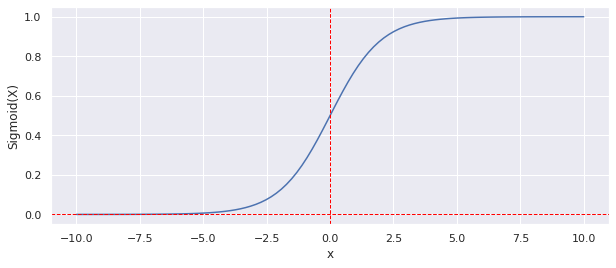

In [0]:
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z), plt.xlabel("x"), plt.ylabel("Sigmoid(X)") 
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0);
plt.show() 

**Make this more and more threshold-like, or step-like, by increasing the weights on the links, and so increasing the summed input:**

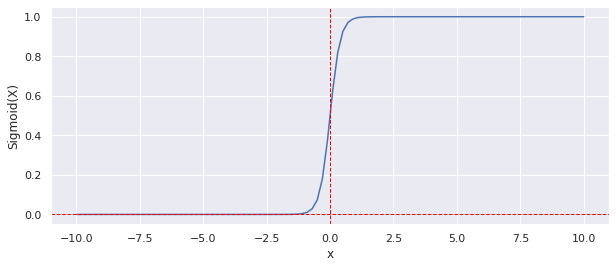

In [0]:
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-5*x)) 
  
plt.plot(x, z), plt.xlabel("x"), plt.ylabel("Sigmoid(X)") 
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0);
plt.show()

**Same happens when expanding the input data scale**

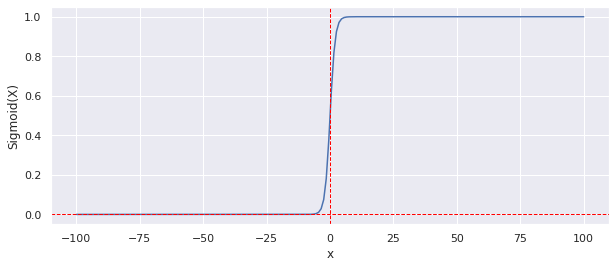

In [0]:
x = np.linspace(-100, 100, 200) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z), plt.xlabel("x"), plt.ylabel("Sigmoid(X)") 
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0);
plt.show()

**Control s-shape depending on input data scale (here scale is large, but sigmoid function has reduced weight size (0.1)**

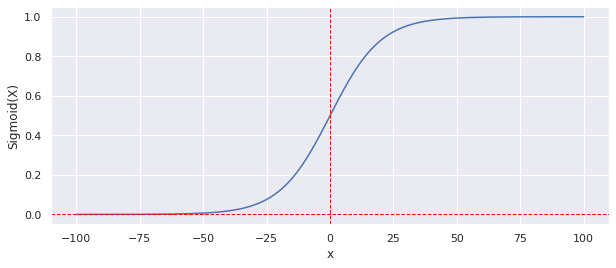

In [0]:
x = np.linspace(-100, 100, 200) 
z = 1/(1 + np.exp(-0.1*x)) 
  
plt.plot(x, z), plt.xlabel("x"), plt.ylabel("Sigmoid(X)") 
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0);
plt.show()

**Formula**

$g(z)=\frac{1}{1+e^{-z}}$

<br> 
**Characteristics**
* Logistic regression. Takes a real-valued number as an input and compresses all its outputs to the range of [0,1]. Sigmoid only for binary classification output layer.
* Sigmoid activation derived from mean field solution of Boltzmann machine
* Softmax function is a more generalized logistic activation function which is used for multiclass classification.

**Advantages**
* In the logistic function, a small change in the input only causes a small change in the output as opposed to the stepped output. Hence, the output is smoother than the step function output.
* Historically popular since they have nice interpretation as a saturating “firing rate” of a neuron.
* The function is differentiable.That means, we can find the slope of the sigmoid curve at any two points.
* Especially used for models where we have to predict the probability as an output (of a binary problem).
* Sigmoid works well for a classifier: approximating a classifier function as combinations of sigmoid is easier than maybe ReLu, for example. Which will lead to faster training process and convergence

**Disadvantages**
* exp() is a bit compute expensive. Learning time longer. Also other functions have been shown to produce the same performance with less iterations. Additionally: small local gradients can mute the gradient and disallow the forward propagation of a useful signal.
* The sigmoid function is monotonic but function’s derivative is not: the tails of the first derivative of a Sigmoid are near zero (covariate shift), which lead to vanishing or exploding gradient. Incorrect weight initialization can lead to saturation, where most neurons of the network then become saturated and almost no learning will take place. Saturated neurons “kill” the gradients (look at x= -10, 0 and 10). Can cause the neural network to get stuck during training. If a strongly-negative input is provided to the logistic sigmoid, it outputs values very near zero. Since neural networks usethe feed-forward activations to calculate parameter gradients, this can result in model parameters that are updated less regularly than we would like, and are thus “stuck” in their current state (this problem can be solved if we normalize the data in advance to be zero-centered as in batch/layer normalization).
* Sigmoid outputs are not zero-centered. Neurons in later layers of processing in a neural net would be receiving data that is not zero-centered. If data coming into is always positive, the gradient on the weights 𝑤 will during backpropagation become either all be positive, or all negative. This could introduce undesirable zig-zagging dynamics in the gradient updates for the weights. (However, notice that once these gradients are added up across a batch of data the final update for the weights can have variable signs, somewhat mitigating this issue. Therefore, this is an inconvenience but it has less severe consequences compared to the saturated activation problem.)

*Example: there are two parameter w1 and w 2; f the gradients of two dimensions are always of the same sign, it means we can only move roughly in the direction of northeast or southwest in the parameter space. If our goal happens to be in the northeast, we can only move in a zig-zagging fashion to get there, just like parallel parking in a narrow space.*

![Zig Zag Sigmoid](https://raw.githubusercontent.com/deltorobarba/repo/master/zigzag.jpeg)

## 1.2 tanh (hyperbolic tangent)

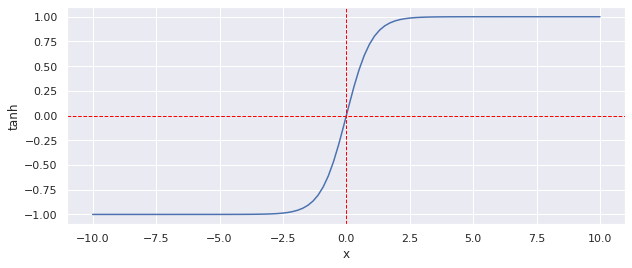

In [3]:
x = np.linspace(-10, 10, 100) 
z = (np.tanh(x)) 
  
plt.plot(x, z), plt.xlabel("x"), plt.ylabel("tanh") 
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0);
plt.show()

$g(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$

* LeCun et al., 1991
* The tanh function "squashes" values to the range -1 and 1. Output values are, therefore, centered around zero. Can be thought of as a scaled, or shifted, sigmoid, and is almost always preferable to the sigmoid function
* Squashes numbers to range [-1,1]
* zero centered (nice)
* The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.
* The function is differentiable.
* The function is monotonic while its derivative is not monotonic.
* The tanh function is mainly used classification between two classes.
* still kills gradients when saturated




## 1.3 Softmax Function

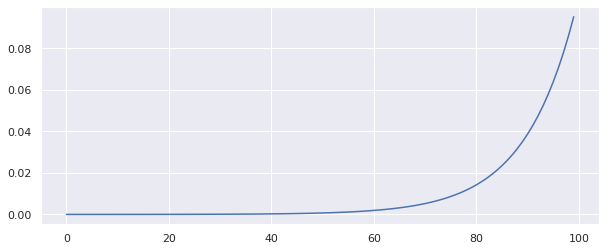

In [12]:
x = np.arange(-5, 5, 0.1)
plt.plot(np.exp(x) / np.sum(np.exp(x)))

* is an activation function that is not function of a single fold x from the previous layer or layers.
* usually used in the last layer
* Softmax Regression (synonyms: Multinomial Logistic, Maximum Entropy Classifier, or just Multi-class Logistic Regression) 
* is a generalization of logistic regression that we can use for multi-class classification (under the assumption that the classes are mutually exclusive). We use the (standard) Logistic Regression model in binary classification tasks. in softmax regression (SMR), we replace the sigmoid logistic function by the so-called€softmax function€φ

# 2. Rectifier Functions

https://en.m.wikipedia.org/wiki/Rectifier_(neural_networks)

**Advantages**
* Biological plausibility: One-sided, compared to the antisymmetry of tanh.
* Sparse activation: For example, in a randomly initialized network, only about 50% of hidden units are activated (having a non-zero output).
* Better gradient propagation: Fewer vanishing gradient problems compared to sigmoidal activation functions that saturate in both directions.
* Efficient computation: Only comparison, addition and multiplication.
* Scale-invariant: 


**Disadvantages**
* Non-differentiable at zero; however, it is differentiable anywhere else, and the value of the derivative at zero can be arbitrarily chosen to be 0 or 1.
* Not zero-centered.
* Unbounded.
* Dying ReLU problem: ReLU neurons can sometimes be pushed into states in which they become inactive for essentially all inputs. In this state, no gradients flow backward through the neuron, and so the neuron becomes stuck in a perpetually inactive state and "dies". This is a form of the vanishing gradient problem. In some cases, large numbers of neurons in a network can become stuck in dead states, effectively decreasing the model capacity. This problem typically arises when the learning rate is set too high. It may be mitigated by using leaky ReLUs instead, which assign a small positive slope for x < 0

## 2.1 ReLU (Rectified Linear Unit)

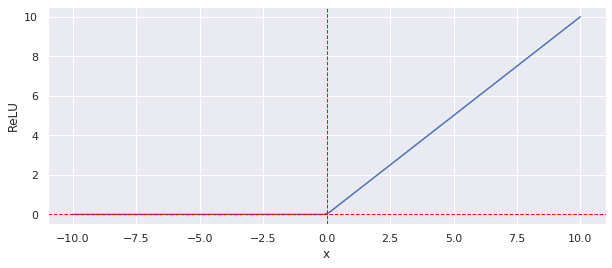

In [6]:
x = np.linspace(-10, 10, 100) 
z = (np.maximum(0, x))
  
plt.plot(x, z), plt.xlabel("x"), plt.ylabel("ReLU") 
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.0);
plt.show()

$g(z)=\max (0, z)$

<br>

Transformation leads positive values to be 1, and negative values to be zero. Shown to accelerate convergence of gradient descent compared to above functions. Can lead to neuron death, which can be combated using Leaky ReLU modification (see [1]). ReLU is has become the default activation function for hidden layers (see [3])

**Characteristics**
* Krizhevsky et al., 2012
* rectified linear units, faster and more efficient, since fewer neurons are activated (less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations). 
* No gradient vanishing problem, as Relu’s gradient is constant = 1. Sparsity: since output 0 for negative values of x! When W*x < 0, Relu gives 0, which means sparsity. Less calculation load. This may be least important. 
* However, ReLu may amplify the signal inside the network more than softmax and sigmoid. 
* But: dying ReLU problem for values zero and smaller: neurons will never reactivated. Solution: leaky ReLU, noisy ReLU (in RBMs) and ELU (exponential linear units)
* ReLU as the activation function for hidden layers and sigmoid for the output layer (these are standards, didn’t experiment much on changing these). Also, I used the standard categorical cross-entropy loss.

**Advantages**
* Does not saturate (in +region)
* Very computationally efficient
* Converges much faster than sigmoid/tanh in practice (e.g. 6x)
Actually more biologically plausible than sigmoid

**Disadvantages**
* Not zero-centered output
* An annoyance: what is the gradient when x < 0? What happens when x = -10, 0 or 10?
* People like to initialize ReLU neurons with slightly positive biases (e.g. 0.01)



## 2.2 Leaky ReLU

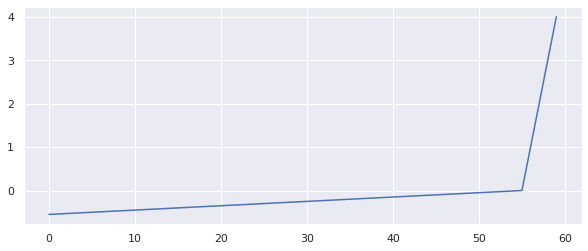

In [0]:
z = np.arange(-55, 5, 1)
plt.plot(np.maximum(0.01 * z, z))

$\begin{aligned}
g(z) &=\max (\epsilon z, z) \\
& \text { with } \epsilon \ll 1
\end{aligned}$

* Mass et al., 2013 and He et al., 2015
* Leaky ReLUs allow a small, positive gradient when the unit is not active
* Does not saturate
* Computationally efficient
* Converges much faster than sigmoid/tanh in practice! (e.g. 6x) will not “die”.


## 2.3 Noisy ReLU

xxx

## 2.4 ELU

* Exponential Linear Units
* Clevert et al., 2015
* All benefits of ReLU
* Closer to zero mean outputs
* Negative saturation regime compared with Leaky ReLU adds some robustness to noise 
* But Computation requires exp()


## 2.5 SELU

* scaled exponential linear units
* instead of normalizing the output of the activation function — the activation function suggested (SELU — scaled exponential linear units) outputs normalized values. https://towardsdatascience.com/selu-make-fnns-great-again-snn-8d61526802a9
* Background: batchnormalization for feedfirward networks: Training Deep Neural Networks is complicated by the fact that the distribution of each layer's inputs changes during training, as the parameters of the previous layers change. This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities. (https://arxiv.org/abs/1502.03167)
* Negative values sometimes: Scaling the function is the mechanism by which the authors accomplish the goal (of self-normalizing properties). As a byproduct, they sometimes output negative values, but there's no hidden meaning in it. It just makes the math work out. 
* **SELU vs RELU**: https://www.hardikp.com/2017/07/24/SELU-vs-RELU/

## 2.6 Swish

* Google Brain 2017
* Variant of ReLU

https://medium.com/@jaiyamsharma/experiments-with-swish-activation-function-on-mnist-dataset-fc89a8c79ff7

https://medium.com/@neuralnets/swish-activation-function-by-google-53e1ea86f820

https://www.machinecurve.com/index.php/2019/05/30/why-swish-could-perform-better-than-relu/



In [0]:
1 / (1 + np.exp(-x))

x * K.sigmoid(beta * x)

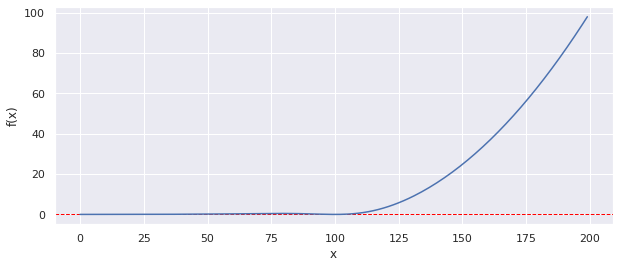

In [0]:
x = np.arange(-10, 10, 0.1)
plt.xlabel('x'), plt.ylabel('f(x)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
beta = 1.0
# plt.plot(x * (1 / (1 + np.exp(-x))))
plt.plot(x * ((1 / (1 + np.exp(-x))) * (beta * x)))

# 3. Additional Activation Functions

## 3.1 Binary Step

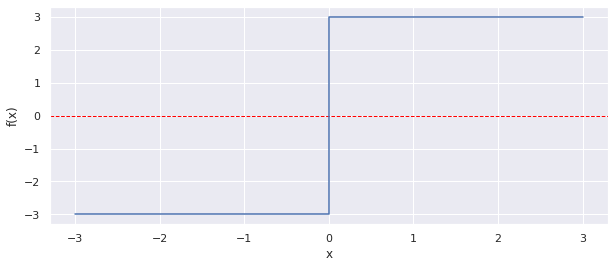

In [0]:
x = [-3, -2, -1, 0, 1, 2, 3]
y = [-3, -3, -3, -3, 3, 3, 3]
# y = [2, 2, 2, 2, 2.9, 2.9, 2.9]
plt.xlabel('x'), plt.ylabel('f(x)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.step(x, y)

* Can be computed wirh tf.where
* However not suitable for gradient-based optimization (will not work)

# Advanced Topics

## Custom Activation Function

Ideas originally from [Stackexchange](https://datascience.stackexchange.com/questions/58884/how-to-create-custom-activation-functions-in-keras-tensorflow)

**Option 1: Easy way**

* Define a function using backend functions, for all operations performed in your myCustomActivation use the Keras backend to get operations executed on the DAG.
* As an example, here the "swish activation" function


In [0]:
from keras import backend as K

# Create Custom Activation Function
def swish(x, beta=1.0):
    return x * K.sigmoid(beta * x)

# Add Custom Activation Function to Model (here Sequential or ConvNet)

model.add(Conv2D(64, (3, 3)))
model.add(Activation(swish))

model = Sequential()
model.add(Dense(120))
model.add(Activation(swish))
model.add(Dense(30, activation= swish))

**Option 2: Advanced Way** 

* an activation is just a trivial layer, thus you can then define your custom activation as a custom layer following instructions here:
* https://keras.io/layers/writing-your-own-keras-layers/
* For all the operations written in the call method use the keras backend (again to get everything done on the DAG).
* For advanced activation functions, with trainable parameters and such, it is best to implement them as a Keras Layer. Here the swish function is used in a layer, allowing beta to be learned while training:



In [0]:
from keras.layers import Layer

class Swish(Layer):

    def __init__(self, beta=1.0, trainable=False, **kwargs):
        super(Swish, self).__init__(**kwargs)
        self.supports_masking = True
        self.beta = beta
        self.trainable = trainable

    def build(self, input_shape):
        self.beta_factor = K.variable(self.beta,
                                      dtype=K.floatx(),
                                      name='beta_factor')
        if self.trainable:
            self._trainable_weights.append(self.beta_factor)

        super(Swish, self).build(input_shape)

    def call(self, inputs, mask=None):
        return swish(inputs, self.beta_factor)

    def get_config(self):
        config = {'beta': self.get_weights()[0] if self.trainable else self.beta,
                  'trainable': self.trainable}
        base_config = super(Swish, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_output_shape(self, input_shape):
        return input_shape

In [0]:
model.add(Conv2D(64, (3, 3)))
model.add(Swish(beta=1.0, trainable=True))

## Adaptive Activation Function

*DNN performance is investigated with three categories of activation functions i.e. saturated, unsaturated and adaptive activation functions. The experimental results showed that the saturation problem of hyperbolic tangent activation function can be solved by adding two trainable parameters in its function. The trainable version of rectified linear unit i.e. parametric rectified linear unit (PReLU) obtained lowest misclassification rate among all types of activation function i.e. 1.6% misclassification rate on MNIST handwritten digit dataset. This is due to the adaptive activation functions allows the network to estimate a better solution by training the activation function parameters during the training process. Therefore, adaptive activation functions improves the generalization of the network to deal with the real-world application.*

[Review of Adaptive Activation Function in Deep Neural Network](https://ieeexplore.ieee.org/document/8626714)

# RNN Model

## Import & Prepare Data

In [0]:
import tensorflow as tf
import datetime, os

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Select Activation Function

activation function als Dense parameter. Activation layer als eigener layer.

keras.activation = functions

keras.layers = layers

**tanh**

In [0]:
activation = tf.keras.activations.tanh

**Sigmoid**

In [0]:
activation = tf.keras.activations.sigmoid

**ReLU**

In [0]:
activation = tf.keras.layers.ReLU(max_value=None,
                                 negative_slope=0,
                                 threshold=0)

**Leaky ReLU**

In [0]:
activation = tf.keras.layers.LeakyReLU(alpha=0.3)

**Softmax**

In [0]:
activation = tf.keras.layers.Softmax(axis=-1)

**Alternatively Add Default Settings**

In [0]:
activation = 'relu'
# activation = 'linear'
# activation = 'sigmoid'
# activation = 'tanh'
# activation = 'softmax'

## Build Model & Run

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation=activation))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=5, validation_data=(x_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.5163 - acc: 0.8140 - val_loss: 0.4457 - val_acc: 0.8403
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4215 - acc: 0.8470 - val_loss: 0.4271 - val_acc: 0.8445
Epoch 3/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3867 - acc: 0.8589 - val_loss: 0.4087 - val_acc: 0.8537
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3668 - acc: 0.8666 - val_loss: 0.4028 - val_acc: 0.8543
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3519 - acc: 0.8710 - val_loss: 0.3739 - val_acc: 0.8629
